<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Arboles_decision_Duvan_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Arbol de clasificación 
##Importar librerías 
#Tratamiento de datos 
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Graficos
import matplotlib.pyplot as plt

#Procesamiento y modelado 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datos= pd.read_csv('Lending_club_cleaned_2.csv')
datos.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          38705 non-null  object 
 1   annual_inc           38705 non-null  float64
 2   verification_status  38705 non-null  object 
 3   emp_length           38705 non-null  object 
 4   home_ownership       38705 non-null  object 
 5   int_rate             38705 non-null  object 
 6   loan_amnt            38705 non-null  int64  
 7   purpose              38705 non-null  object 
 8   term                 38705 non-null  object 
 9   grade                38705 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.0+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facda6cee10>,
      dtype=object)

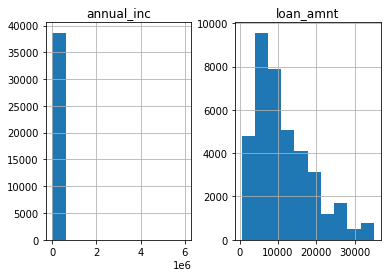

In [ ]:
datos.hist()

In [ ]:
datos['loan_status_def']=np.where(datos.loan_status == 'Fully Paid',1,0)

In [ ]:
datos.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade,loan_status_def
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B,1
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C,0
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C,1
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C,1
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B,1


In [ ]:
datos=datos.drop(columns='loan_status')

In [ ]:
datos.head()

,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade,loan_status_def
0,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B,1
1,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C,0
2,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C,1
3,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C,1
4,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B,1


In [ ]:
datos_dummies=pd.get_dummies(datos)

In [ ]:
datos.groupby('loan_status_def')['loan_status_def'].count()

loan_status_def
0     5440
1    33265
Name: loan_status_def, dtype: int64

In [ ]:
import re

In [ ]:
datos['int_rate']=datos['int_rate'].apply(lambda x: re.findall('[0-9]',x))

In [ ]:
datos['int_rate']=datos['int_rate'].apply(lambda x: int("".join(x))/100)

In [ ]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(datos.drop(columns='loan_status_def'),
                                                                    datos['loan_status_def'],
                                                                    train_size=0.7,
                                                                    random_state=123)

In [ ]:
#Codificar variables categóricas
catCol = xEntrenamiento.select_dtypes(include= ['object','category'] ).columns.to_list()
numCol = xEntrenamiento.select_dtypes(include= ['float64','int64'] ).columns.to_list()

preprocesador = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown = 'ignore'),catCol)],remainder = 'passthrough')


xEntrenamientoPre =preprocesador.fit_transform(xEntrenamiento)
xPruebaPre = preprocesador.fit_transform(xPrueba)

In [ ]:
codCat=preprocesador.named_transformers_['onehot'].get_feature_names(catCol)
labels = np.concatenate([codCat,numCol])

xEntrenamientoProc = pd.DataFrame.sparse.from_spmatrix(xEntrenamientoPre, columns=labels)
xPruebaProc = pd.DataFrame.sparse.from_spmatrix(xPruebaPre, columns=labels)

xEntrenamientoProc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype             
---  ------                               --------------  -----             
 0   verification_status_Not Verified     27093 non-null  Sparse[float64, 0]
 1   verification_status_Source Verified  27093 non-null  Sparse[float64, 0]
 2   verification_status_Verified         27093 non-null  Sparse[float64, 0]
 3   emp_length_1 year                    27093 non-null  Sparse[float64, 0]
 4   emp_length_10+ years                 27093 non-null  Sparse[float64, 0]
 5   emp_length_2 years                   27093 non-null  Sparse[float64, 0]
 6   emp_length_3 years                   27093 non-null  Sparse[float64, 0]
 7   emp_length_4 years                   27093 non-null  Sparse[float64, 0]
 8   emp_length_5 years                   27093 non-null  Sparse[float64, 0]
 9   emp_length_6 years                   27

In [ ]:
#Modelar los datos 
modelo = DecisionTreeClassifier(max_depth=10,
                                criterion='gini',
                                random_state=123)

In [ ]:
modelo.fit(xEntrenamientoProc,yEntrenamiento)

DecisionTreeClassifier(max_depth=10, random_state=123)

Profundidad del arbol: 10
Número de nodos terminales: 460


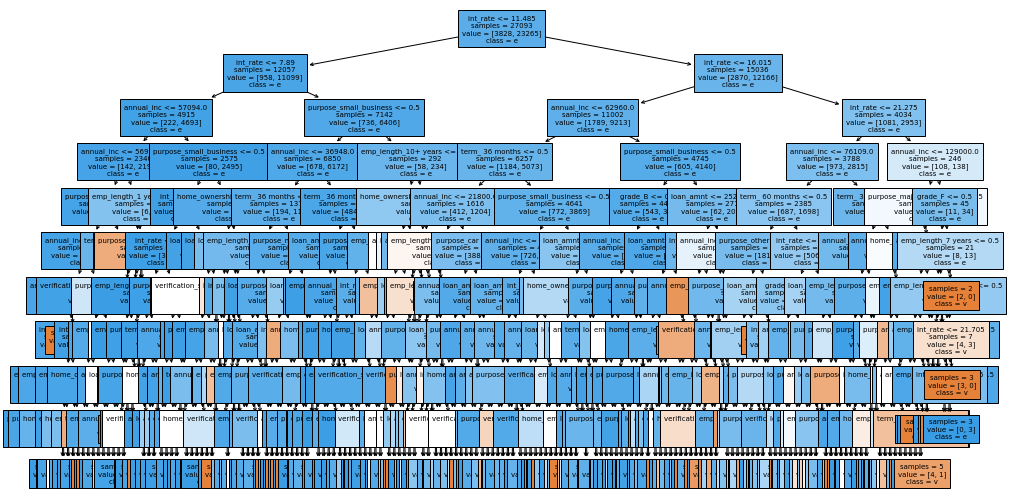

In [ ]:
fig,ax=plt.subplots(figsize=(16,9))
print(f"Profundidad del arbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
                feature_names = labels.tolist(),
                class_names='ventasAltas',
                filled=True,
                impurity=False,
                fontsize=7,
                ax=ax)

In [ ]:
#Desempeño en entrenamiento 
accuracyEnt = accuracy_score(y_true= yEntrenamiento,
                             y_pred=modelo.predict(xEntrenamientoProc))

print(f"El dedsempeño en entrenamiento es:{accuracyEnt}")

El dedsempeño en entrenamiento es:0.8735466725722512


In [ ]:

#Matriz ed confusión en entrenamiento 
print('Matriz de confusión')
print('----------------------------------------')
confusion_matrix(y_true = yEntrenamiento,
                 y_pred=modelo.predict(xEntrenamientoProc))

Matriz de confusión
----------------------------------------


array([[  532,  3296],
       [  130, 23135]])

In [ ]:
##Evaluar el modelo  en prueba
predicciones = modelo.predict(xPruebaProc)
#Matriz ed confusión en entrenamiento 
print('Matriz de confusión')
print('----------------------------------------')
confusion_matrix(y_true = yPrueba,
                 y_pred=predicciones)

Matriz de confusión
----------------------------------------


array([[  85, 1527],
       [ 235, 9765]])

In [ ]:
#Desempeño en entrenamiento 
accuracyEnt = accuracy_score(y_true= yPrueba,
                             y_pred=modelo.predict(xPruebaProc))

print(f"El dedsempeño en entrenamiento es:{accuracyEnt}")

El dedsempeño en entrenamiento es:0.8482604202549087
